In [1]:
import json
import os


import pandas as pd
import numpy as np

from tqdm import tqdm
import random as rn


# Plotting
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns


# Image Processing
import cv2
from PIL import Image


# SK-Learn
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator


# KERAS, Tensorflow
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.layers import Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization

from tensorflow.keras.callbacks import ModelCheckpoint, History
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

import tensorflow as tf

Using TensorFlow backend.


In [8]:
# set variables 
filename1 = r'C:\Users\Sarah rudigkeit\Documents\Sarah\PhD\Zellnachverfolgung\Training\Juni 2019\Juni2019_Pos1.json'
filename2 = r'C:\Users\Sarah rudigkeit\Documents\Sarah\PhD\Zellnachverfolgung\Training\Juni 2019\Juni2019_Pos2.json'
filename3 = r'C:\Users\Sarah rudigkeit\Documents\Sarah\PhD\Zellnachverfolgung\Training\Juni 2019\Juni2019_Pos3.json'
filename4 = r'C:\Users\Sarah rudigkeit\Documents\Sarah\PhD\Zellnachverfolgung\Training\Juni 2019\Juni2019_Pos4.json'
filename5 = r'C:\Users\Sarah rudigkeit\Documents\Sarah\PhD\Zellnachverfolgung\Training\Oktober 2018\Pos1_2240+2241.json'
filename6 = r'C:\Users\Sarah rudigkeit\Documents\Sarah\PhD\Zellnachverfolgung\Training\Oktober 2018\Pos2_2240+2241.json'
filename7 = r'C:\Users\Sarah rudigkeit\Documents\Sarah\PhD\Zellnachverfolgung\Training\Oktober 2018\Pos3_2240+2241.json'
filename8 = r'C:\Users\Sarah rudigkeit\Documents\Sarah\PhD\Zellnachverfolgung\Training\Oktober 2018\Pos4_2240+2241.json'
#filename = 'via_project_training_test.json'
main_folder = r'C:\Users\Sarah rudigkeit\Documents\Sarah\PhD\Zellnachverfolgung\Training'
#main_folder = r'C:\Users\Sarah rudigkeit\Documents\Sarah\PhD\Zellnachverfolgung\VGG_image_Annotator'
images_folder = os.path.join(main_folder, r'Images') 
#images_folder11 = os.path.join(main_folder, r'648_Pos1')
#images_folder12 = os.path.join(main_folder, r'649_Pos1')
#images_folder21 = os.path.join(main_folder, r'648_Pos2')
#images_folder22 = os.path.join(main_folder, r'648_Pos2')
#images_folder31 = os.path.join(main_folder, r'648_Pos3')
#images_folder32 = os.path.join(main_folder, r'648_Pos3')
#images_folder41 = os.path.join(main_folder, r'648_Pos4')
#images_folder42 = os.path.join(main_folder, r'648_Pos4')
#EXAMPLE_PIC = os.path.join(images_folder, '1-1-Hela_TMRE_2240_Pos1.jpg')

TRAINING_SAMPLES = 10000
VALIDATION_SAMPLES = 2000
TEST_SAMPLES = 2000
IMG_WIDTH = 178
IMG_HEIGHT = 218
BATCH_SIZE = 16
NUM_EPOCHS = 20
print(images_folder)
datastore = []

C:\Users\Sarah rudigkeit\Documents\Sarah\PhD\Zellnachverfolgung\Training\Images


In [9]:
with open(filename1, 'r') as f:
    datastore1 = json.load(f)
    
with open(filename2, 'r') as f:
    datastore2 = json.load(f)
    
with open(filename3, 'r') as f:
    datastore3 = json.load(f)
    
with open(filename4, 'r') as f:
    datastore4 = json.load(f)
with open(filename5, 'r') as f:
    datastore5 = json.load(f)
    
with open(filename6, 'r') as f:
    datastore6 = json.load(f)

with open(filename7, 'r') as f:
    datastore7 = json.load(f)

with open(filename8, 'r') as f:
    datastore8 = json.load(f)
    
image_size = {'image_width': 1388, 'image_height': 1044}

cell_df = pd.DataFrame(columns = ['imagename', 'x', 'width', 'y', 'height', 'label'])


for item_images in list(datastore1['_via_img_metadata'].keys()):
    str_filename = datastore1['_via_img_metadata'][item_images]['filename']
    for item_regions in datastore1['_via_img_metadata'][item_images]['regions']:
            
        try:
            for keys in item_regions['region_attributes']['type']: 
                label = str(keys)
            
            x = item_regions['shape_attributes']['x']
            y = item_regions['shape_attributes']['y']
            width = item_regions['shape_attributes']['width']
            height = item_regions['shape_attributes']['height']
            
            it_df = pd.DataFrame({'imagename': [str_filename], 'x': [x], 'width': [width], 'y': [y], 'height': [height], 'label': [label]})
            
            cell_df = cell_df.append(it_df, ignore_index = True)
            
            
        except:
            pass

for item_images in list(datastore2['_via_img_metadata'].keys()):
    str_filename = datastore2['_via_img_metadata'][item_images]['filename']
    for item_regions in datastore2['_via_img_metadata'][item_images]['regions']:
            
        try:
            for keys in item_regions['region_attributes']['type']: 
                label = str(keys)
            #label = item_regions['region_attributes']['type']
            
            x = item_regions['shape_attributes']['x']
            y = item_regions['shape_attributes']['y']
            width = item_regions['shape_attributes']['width']
            height = item_regions['shape_attributes']['height']
            
            it_df = pd.DataFrame({'imagename': [str_filename], 'x': [x], 'width': [width], 'y': [y], 'height': [height], 'label': [label]})
            
            cell_df = cell_df.append(it_df, ignore_index = True)
            
            
        except:
            pass
        
for item_images in list(datastore3['_via_img_metadata'].keys()):
    str_filename = datastore3['_via_img_metadata'][item_images]['filename']
    for item_regions in datastore3['_via_img_metadata'][item_images]['regions']:
            
        try:
            for keys in item_regions['region_attributes']['type']: 
                label = str(keys)
                #label = item_regions['region_attributes']['type']
            
            x = item_regions['shape_attributes']['x']
            y = item_regions['shape_attributes']['y']
            width = item_regions['shape_attributes']['width']
            height = item_regions['shape_attributes']['height']
            
            it_df = pd.DataFrame({'imagename': [str_filename], 'x': [x], 'width': [width], 'y': [y], 'height': [height], 'label': [label]})
            
            cell_df = cell_df.append(it_df, ignore_index = True)
            
            
        except:
            pass
        
for item_images in list(datastore4['_via_img_metadata'].keys()):
    str_filename = datastore4['_via_img_metadata'][item_images]['filename']
    for item_regions in datastore4['_via_img_metadata'][item_images]['regions']:
            
        try:
            for keys in item_regions['region_attributes']['type']: 
                label = str(keys)
                #label = item_regions['region_attributes']['type']
            
            x = item_regions['shape_attributes']['x']
            y = item_regions['shape_attributes']['y']
            width = item_regions['shape_attributes']['width']
            height = item_regions['shape_attributes']['height']
            
            it_df = pd.DataFrame({'imagename': [str_filename], 'x': [x], 'width': [width], 'y': [y], 'height': [height], 'label': [label]})
            
            cell_df = cell_df.append(it_df, ignore_index = True)
            
            
        except:
            pass
        
for item_images in list(datastore5['_via_img_metadata'].keys()):
    str_filename = datastore5['_via_img_metadata'][item_images]['filename']
    for item_regions in datastore5['_via_img_metadata'][item_images]['regions']:
            
        try:
            for keys in item_regions['region_attributes']['type']: 
                label = str(keys)
                #label = item_regions['region_attributes']['type']
            
            x = item_regions['shape_attributes']['x']
            y = item_regions['shape_attributes']['y']
            width = item_regions['shape_attributes']['width']
            height = item_regions['shape_attributes']['height']
            
            it_df = pd.DataFrame({'imagename': [str_filename], 'x': [x], 'width': [width], 'y': [y], 'height': [height], 'label': [label]})
            
            cell_df = cell_df.append(it_df, ignore_index = True)
            
            
        except:
            pass

for item_images in list(datastore6['_via_img_metadata'].keys()):
    str_filename = datastore6['_via_img_metadata'][item_images]['filename']
    for item_regions in datastore6['_via_img_metadata'][item_images]['regions']:
            
        try:
            for keys in item_regions['region_attributes']['type']: 
                label = str(keys)
                #label = item_regions['region_attributes']['type']
            
            x = item_regions['shape_attributes']['x']
            y = item_regions['shape_attributes']['y']
            width = item_regions['shape_attributes']['width']
            height = item_regions['shape_attributes']['height']
            
            it_df = pd.DataFrame({'imagename': [str_filename], 'x': [x], 'width': [width], 'y': [y], 'height': [height], 'label': [label]})
            
            cell_df = cell_df.append(it_df, ignore_index = True)
            
            
        except:
            pass

for item_images in list(datastore7['_via_img_metadata'].keys()):
    str_filename = datastore7['_via_img_metadata'][item_images]['filename']
    for item_regions in datastore7['_via_img_metadata'][item_images]['regions']:
            
        try:
            for keys in item_regions['region_attributes']['type']: 
                label = str(keys)
                #label = item_regions['region_attributes']['type']
            
            x = item_regions['shape_attributes']['x']
            y = item_regions['shape_attributes']['y']
            width = item_regions['shape_attributes']['width']
            height = item_regions['shape_attributes']['height']
            
            it_df = pd.DataFrame({'imagename': [str_filename], 'x': [x], 'width': [width], 'y': [y], 'height': [height], 'label': [label]})
            
            cell_df = cell_df.append(it_df, ignore_index = True)
            
            
        except:
            pass
for item_images in list(datastore8['_via_img_metadata'].keys()):
    str_filename = datastore8['_via_img_metadata'][item_images]['filename']
    for item_regions in datastore8['_via_img_metadata'][item_images]['regions']:
            
        try:
            for keys in item_regions['region_attributes']['type']: 
                label = str(keys)
                #label = item_regions['region_attributes']['type']
            
            x = item_regions['shape_attributes']['x']
            y = item_regions['shape_attributes']['y']
            width = item_regions['shape_attributes']['width']
            height = item_regions['shape_attributes']['height']
            
            it_df = pd.DataFrame({'imagename': [str_filename], 'x': [x], 'width': [width], 'y': [y], 'height': [height], 'label': [label]})
            
            cell_df = cell_df.append(it_df, ignore_index = True)
            
            
        except:
            pass

#Einlesen der Bilder für das Training
def crop_image_to_bbox(img_arr, X_meta):
    """Given an image array, crops the image to just the bounding box provided."""
    shape = img_arr.shape
    x_min = int(X_meta['x'])
    x_max = int(X_meta['x'] + X_meta['width'])
    y_min = int(X_meta['y'])
    y_max = int(X_meta['y'] + X_meta['height'])
    
   
    return img_arr[y_min:y_max, x_min:x_max]  

def get_image_arr(img):
    """Returns the image read out from local disk into a numpy array."""
    return np.asarray(Image.open(os.path.join(images_folder, img)))     

for entry in range(len(cell_df)):
    
    # Issues with Crop number 144
    #if entry == 144:
    #    pass
    #else: 
        
        
        #print(cell_df.iloc[entry]['imagename'])
    imagename_crop = 'img_' + str(entry) + '_' + cell_df.iloc[entry]['label'] +'.png'
        #print(imagename_crop)
    plt.imsave('crops\\' + cell_df.iloc[entry]['label'] + '\\' + imagename_crop, crop_image_to_bbox(get_image_arr(cell_df.iloc[entry]['imagename']), cell_df.iloc[entry]), cmap = 'gray')
        
#Training
X=[]
Z=[]     
IMG_SIZE=150

LIV_DIR='crops/liv'
DIV_DIR='crops/div'
DEAD_DIR='crops/dead'
ROUND_DIR='crops/round'

def assign_label(img,cell_type):
    return cell_type

def make_train_data(cell_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,cell_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))
        
make_train_data('liv',LIV_DIR)
make_train_data('div',DIV_DIR)
make_train_data('round',ROUND_DIR)
make_train_data('dead',DEAD_DIR)

100%|████████████████████████████████████████████████████████████████████████████| 4551/4551 [00:04<00:00, 1057.03it/s]


In [4]:
le=LabelEncoder()
Y=le.fit_transform(Z)
le.inverse_transform([0,1,2,3])
Y=to_categorical(Y,4)
X=np.array(X)
X=X/255
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

NameError: name 'Z' is not defined

In [5]:
#Bestehendes Modell hier laden
model = Sequential()
model = load_model('weights/CNN_epochs500_batch128.hdf5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 96)       

In [6]:
#Modell trainieren
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

#Modell Architektur definieren

# # modelling starts using a CNN.

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(4, activation = "softmax"))

In [7]:
#Daten generieren
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=90,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images
        #brightness_range=[0.5, 1.5])

In [8]:
optimizer = Adam(lr=0.001)
model.compile(optimizer= optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
batch_size=128
epochs=50

callback_checkpoint = ModelCheckpoint('weights/CNN_epochs{0}_batch{1}.hdf5'.format(
        epochs, batch_size), monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='min')

callback_history = History()
Training_history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size, callbacks=[callback_history, callback_checkpoint])

Epoch 1/50
43/43 [==============================] - ETA: 6:48 - loss: 1.3955 - accuracy: 0.21 - ETA: 4:57 - loss: 1.1611 - accuracy: 0.46 - ETA: 3:54 - loss: 1.2894 - accuracy: 0.55 - ETA: 3:24 - loss: 1.2669 - accuracy: 0.57 - ETA: 3:01 - loss: 1.2069 - accuracy: 0.59 - ETA: 2:45 - loss: 1.1886 - accuracy: 0.61 - ETA: 2:34 - loss: 1.1771 - accuracy: 0.62 - ETA: 2:25 - loss: 1.1642 - accuracy: 0.62 - ETA: 2:17 - loss: 1.1528 - accuracy: 0.63 - ETA: 2:09 - loss: 1.1219 - accuracy: 0.64 - ETA: 2:02 - loss: 1.1055 - accuracy: 0.64 - ETA: 1:56 - loss: 1.1030 - accuracy: 0.65 - ETA: 1:51 - loss: 1.0822 - accuracy: 0.65 - ETA: 1:45 - loss: 1.0770 - accuracy: 0.65 - ETA: 1:41 - loss: 1.0644 - accuracy: 0.66 - ETA: 1:36 - loss: 1.0510 - accuracy: 0.66 - ETA: 1:32 - loss: 1.0435 - accuracy: 0.66 - ETA: 1:28 - loss: 1.0353 - accuracy: 0.66 - ETA: 1:24 - loss: 1.0209 - accuracy: 0.67 - ETA: 1:20 - loss: 1.0123 - accuracy: 0.67 - ETA: 1:16 - loss: 1.0072 - accuracy: 0.67 - ETA: 1:12 - loss: 1.0112

43/43 [==============================] - ETA: 1:44 - loss: 0.6935 - accuracy: 0.76 - ETA: 1:40 - loss: 0.6749 - accuracy: 0.76 - ETA: 1:37 - loss: 0.6492 - accuracy: 0.76 - ETA: 1:35 - loss: 0.6382 - accuracy: 0.76 - ETA: 1:32 - loss: 0.6609 - accuracy: 0.75 - ETA: 1:30 - loss: 0.6768 - accuracy: 0.74 - ETA: 1:27 - loss: 0.6785 - accuracy: 0.74 - ETA: 1:26 - loss: 0.6657 - accuracy: 0.74 - ETA: 1:25 - loss: 0.6611 - accuracy: 0.74 - ETA: 1:23 - loss: 0.6604 - accuracy: 0.74 - ETA: 1:21 - loss: 0.6511 - accuracy: 0.74 - ETA: 1:19 - loss: 0.6557 - accuracy: 0.74 - ETA: 1:17 - loss: 0.6547 - accuracy: 0.74 - ETA: 1:14 - loss: 0.6454 - accuracy: 0.74 - ETA: 1:12 - loss: 0.6401 - accuracy: 0.74 - ETA: 1:10 - loss: 0.6465 - accuracy: 0.74 - ETA: 1:09 - loss: 0.6412 - accuracy: 0.74 - ETA: 1:06 - loss: 0.6483 - accuracy: 0.74 - ETA: 1:04 - loss: 0.6543 - accuracy: 0.74 - ETA: 1:02 - loss: 0.6583 - accuracy: 0.73 - ETA: 59s - loss: 0.6609 - accuracy: 0.7388 - ETA: 56s - loss: 0.6582 - accuracy

43/43 [==============================] - ETA: 2:01 - loss: 0.6304 - accuracy: 0.80 - ETA: 1:57 - loss: 0.5382 - accuracy: 0.82 - ETA: 1:54 - loss: 0.5577 - accuracy: 0.78 - ETA: 1:50 - loss: 0.5458 - accuracy: 0.77 - ETA: 1:47 - loss: 0.5720 - accuracy: 0.75 - ETA: 1:44 - loss: 0.5749 - accuracy: 0.76 - ETA: 1:41 - loss: 0.5678 - accuracy: 0.77 - ETA: 1:38 - loss: 0.5671 - accuracy: 0.76 - ETA: 1:34 - loss: 0.5716 - accuracy: 0.76 - ETA: 1:31 - loss: 0.5767 - accuracy: 0.76 - ETA: 1:28 - loss: 0.5799 - accuracy: 0.76 - ETA: 1:25 - loss: 0.5846 - accuracy: 0.76 - ETA: 1:22 - loss: 0.5889 - accuracy: 0.76 - ETA: 1:19 - loss: 0.5893 - accuracy: 0.76 - ETA: 1:16 - loss: 0.5890 - accuracy: 0.76 - ETA: 1:14 - loss: 0.5895 - accuracy: 0.76 - ETA: 1:12 - loss: 0.5804 - accuracy: 0.76 - ETA: 1:09 - loss: 0.5816 - accuracy: 0.76 - ETA: 1:07 - loss: 0.5850 - accuracy: 0.76 - ETA: 1:04 - loss: 0.5847 - accuracy: 0.76 - ETA: 1:01 - loss: 0.5840 - accuracy: 0.76 - ETA: 59s - loss: 0.5836 - accuracy:

43/43 [==============================] - ETA: 1:42 - loss: 0.5396 - accuracy: 0.75 - ETA: 1:39 - loss: 0.6235 - accuracy: 0.73 - ETA: 1:37 - loss: 0.5983 - accuracy: 0.75 - ETA: 1:35 - loss: 0.5896 - accuracy: 0.75 - ETA: 1:32 - loss: 0.5550 - accuracy: 0.77 - ETA: 1:30 - loss: 0.5410 - accuracy: 0.77 - ETA: 1:28 - loss: 0.5293 - accuracy: 0.78 - ETA: 1:25 - loss: 0.5153 - accuracy: 0.80 - ETA: 1:23 - loss: 0.5291 - accuracy: 0.79 - ETA: 1:20 - loss: 0.5413 - accuracy: 0.78 - ETA: 1:18 - loss: 0.5399 - accuracy: 0.78 - ETA: 1:16 - loss: 0.5371 - accuracy: 0.78 - ETA: 1:13 - loss: 0.5387 - accuracy: 0.78 - ETA: 1:11 - loss: 0.5388 - accuracy: 0.78 - ETA: 1:08 - loss: 0.5403 - accuracy: 0.78 - ETA: 1:05 - loss: 0.5413 - accuracy: 0.78 - ETA: 1:03 - loss: 0.5432 - accuracy: 0.78 - ETA: 1:00 - loss: 0.5395 - accuracy: 0.78 - ETA: 58s - loss: 0.5406 - accuracy: 0.7854 - ETA: 55s - loss: 0.5389 - accuracy: 0.784 - ETA: 53s - loss: 0.5413 - accuracy: 0.783 - ETA: 50s - loss: 0.5427 - accuracy

43/43 [==============================] - ETA: 1:58 - loss: 0.6370 - accuracy: 0.66 - ETA: 1:54 - loss: 0.5679 - accuracy: 0.73 - ETA: 1:51 - loss: 0.5412 - accuracy: 0.75 - ETA: 1:49 - loss: 0.5525 - accuracy: 0.75 - ETA: 1:46 - loss: 0.5583 - accuracy: 0.75 - ETA: 1:43 - loss: 0.5439 - accuracy: 0.75 - ETA: 1:40 - loss: 0.5333 - accuracy: 0.76 - ETA: 1:26 - loss: 0.5051 - accuracy: 0.76 - ETA: 1:25 - loss: 0.4910 - accuracy: 0.77 - ETA: 1:23 - loss: 0.4871 - accuracy: 0.77 - ETA: 1:22 - loss: 0.4906 - accuracy: 0.77 - ETA: 1:20 - loss: 0.4819 - accuracy: 0.78 - ETA: 1:18 - loss: 0.4850 - accuracy: 0.78 - ETA: 1:15 - loss: 0.4924 - accuracy: 0.78 - ETA: 1:13 - loss: 0.4926 - accuracy: 0.78 - ETA: 1:11 - loss: 0.4946 - accuracy: 0.78 - ETA: 1:08 - loss: 0.4907 - accuracy: 0.78 - ETA: 1:06 - loss: 0.4901 - accuracy: 0.78 - ETA: 1:03 - loss: 0.4958 - accuracy: 0.78 - ETA: 1:01 - loss: 0.4940 - accuracy: 0.78 - ETA: 58s - loss: 0.4953 - accuracy: 0.7871 - ETA: 56s - loss: 0.4990 - accuracy

43/43 [==============================] - ETA: 1:41 - loss: 0.5325 - accuracy: 0.82 - ETA: 1:40 - loss: 0.5183 - accuracy: 0.80 - ETA: 1:38 - loss: 0.4817 - accuracy: 0.80 - ETA: 1:35 - loss: 0.5269 - accuracy: 0.80 - ETA: 1:33 - loss: 0.5099 - accuracy: 0.81 - ETA: 1:31 - loss: 0.5425 - accuracy: 0.81 - ETA: 1:29 - loss: 0.5286 - accuracy: 0.80 - ETA: 1:26 - loss: 0.5325 - accuracy: 0.80 - ETA: 1:24 - loss: 0.5241 - accuracy: 0.80 - ETA: 1:21 - loss: 0.5216 - accuracy: 0.80 - ETA: 1:19 - loss: 0.5162 - accuracy: 0.80 - ETA: 1:16 - loss: 0.4980 - accuracy: 0.80 - ETA: 1:14 - loss: 0.4951 - accuracy: 0.80 - ETA: 1:11 - loss: 0.4924 - accuracy: 0.80 - ETA: 1:09 - loss: 0.4922 - accuracy: 0.80 - ETA: 1:06 - loss: 0.4955 - accuracy: 0.80 - ETA: 1:04 - loss: 0.4920 - accuracy: 0.80 - ETA: 1:02 - loss: 0.4938 - accuracy: 0.80 - ETA: 59s - loss: 0.4942 - accuracy: 0.8022 - ETA: 57s - loss: 0.4991 - accuracy: 0.800 - ETA: 54s - loss: 0.5006 - accuracy: 0.801 - ETA: 52s - loss: 0.5010 - accuracy

43/43 [==============================] - ETA: 1:59 - loss: 0.3509 - accuracy: 0.89 - ETA: 1:54 - loss: 0.3868 - accuracy: 0.86 - ETA: 1:46 - loss: 0.4203 - accuracy: 0.84 - ETA: 1:44 - loss: 0.4282 - accuracy: 0.83 - ETA: 1:42 - loss: 0.4212 - accuracy: 0.84 - ETA: 1:40 - loss: 0.4216 - accuracy: 0.84 - ETA: 1:37 - loss: 0.4449 - accuracy: 0.83 - ETA: 1:34 - loss: 0.4465 - accuracy: 0.83 - ETA: 1:31 - loss: 0.4570 - accuracy: 0.82 - ETA: 1:27 - loss: 0.4664 - accuracy: 0.82 - ETA: 1:24 - loss: 0.4674 - accuracy: 0.82 - ETA: 1:21 - loss: 0.4660 - accuracy: 0.82 - ETA: 1:18 - loss: 0.4665 - accuracy: 0.81 - ETA: 1:15 - loss: 0.4701 - accuracy: 0.81 - ETA: 1:13 - loss: 0.4616 - accuracy: 0.81 - ETA: 1:10 - loss: 0.4529 - accuracy: 0.81 - ETA: 1:07 - loss: 0.4534 - accuracy: 0.82 - ETA: 1:04 - loss: 0.4525 - accuracy: 0.82 - ETA: 59s - loss: 0.4841 - accuracy: 0.8224 - ETA: 56s - loss: 0.4830 - accuracy: 0.822 - ETA: 55s - loss: 0.4845 - accuracy: 0.819 - ETA: 52s - loss: 0.4827 - accuracy

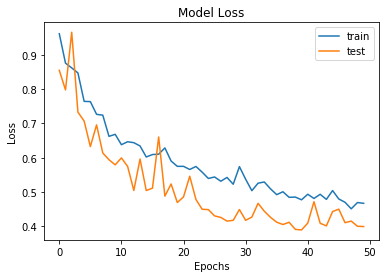

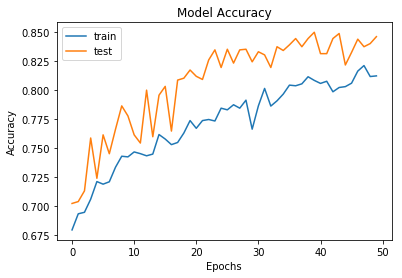

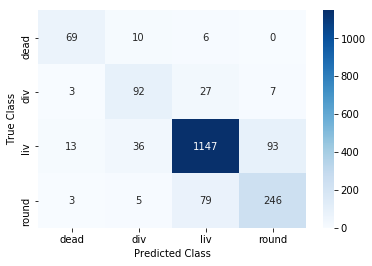

              precision    recall  f1-score   support

        dead       0.78      0.81      0.80        85
         div       0.64      0.71      0.68       129
         liv       0.91      0.89      0.90      1289
       round       0.71      0.74      0.72       333

   micro avg       0.85      0.85      0.85      1836
   macro avg       0.76      0.79      0.77      1836
weighted avg       0.85      0.85      0.85      1836



In [9]:
#Accuracy und loss des Modells
plt.figure(1)
plt.plot(Training_history.history['loss'])
plt.plot(Training_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

plt.figure(2)
plt.plot(Training_history.history['accuracy'])
plt.plot(Training_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

#Modellperformance am Validierungsset
# getting predictions on val set.
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

# Confusion matrix
target_names = le.inverse_transform([0,1,2,3])
cm = confusion_matrix(np.argmax(y_test, axis=1), pred_digits)

plt.figure(3)
ax = sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = '.0f', xticklabels = target_names, yticklabels = target_names)
ax.set(xlabel='Predicted Class', ylabel='True Class')
plt.show()

print(classification_report(np.argmax(y_test, axis=1), pred_digits, target_names=target_names))

# now storing some properly as well as misclassified indexes'.

#prop_class=[]
#mis_class=[]
#
#i=0
#
#for i in range(len(y_test)):
#    if(np.argmax(y_test[i])==pred_digits[i]):
#        prop_class.append(i)
#    if(len(prop_class)==8):
#        break
#
#i=0
#for i in range(len(y_test)):
#    if (not np.argmax(y_test[i])==pred_digits[i]):
#        mis_class.append(i)
#    if(len(mis_class)==8):
#        break
#
## Ignore  the warnings
#import warnings
#warnings.filterwarnings('always')
#warnings.filterwarnings('ignore')
